In [38]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

In [2]:
# load the iris dataset for use in the questions
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

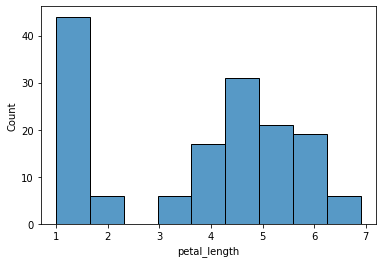

In [9]:
#1 what does the distribution of petal lengths look like
sns.histplot(iris.petal_length)
# the petal lengths have a bimodal distribution
# the first and smaller distribution is strongly skewed towards smaller petals
# the second and larger grouping appears to have a normal distribution

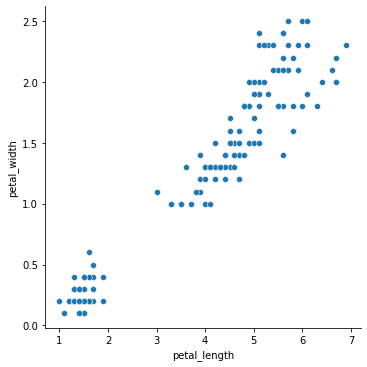

In [10]:
#2 is there a correlation between petal length and width
sns.relplot(x = 'petal_length', y = 'petal_width', data = iris)
# the relationship appears close to linear

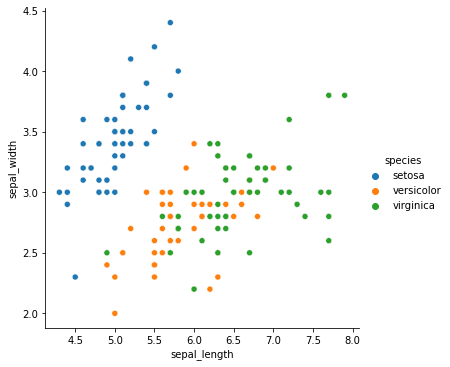

In [11]:
#3 would it be reasonable to predict species based on sepal length and sepal width
sns.relplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', data = iris)
# you could separate setosa from the other two species with this method,
# but virginica and versicolor overlap with each other

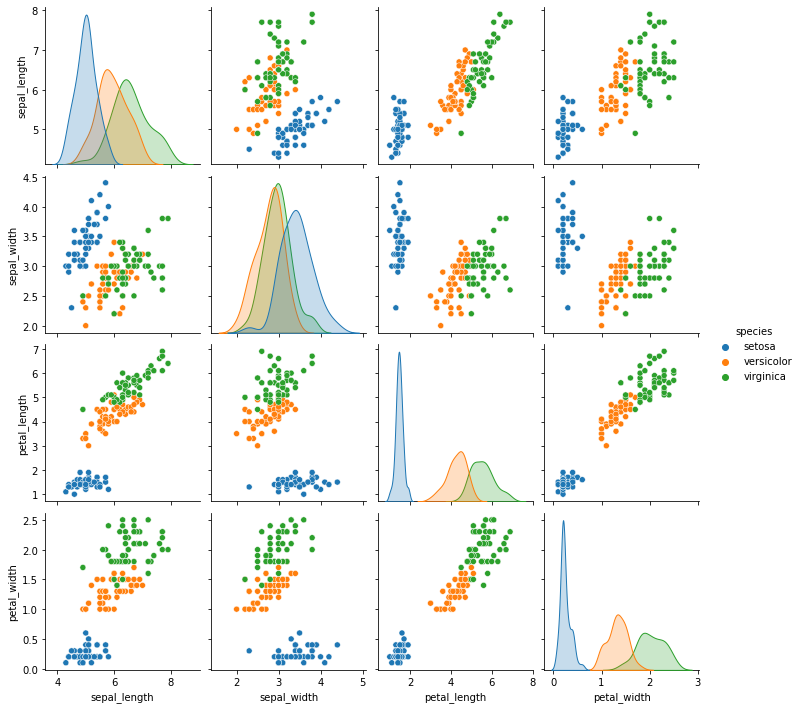

In [13]:
#4 which features could best predict species
sns.pairplot(iris, hue = 'species')
# petal length and width appear to be the best predictors

In [17]:
#1 groupby the anscombe dataset, and calculate the summary statistics

anscombe = sns.load_dataset('anscombe')
#anscombe.groupby('dataset').agg('mean')
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

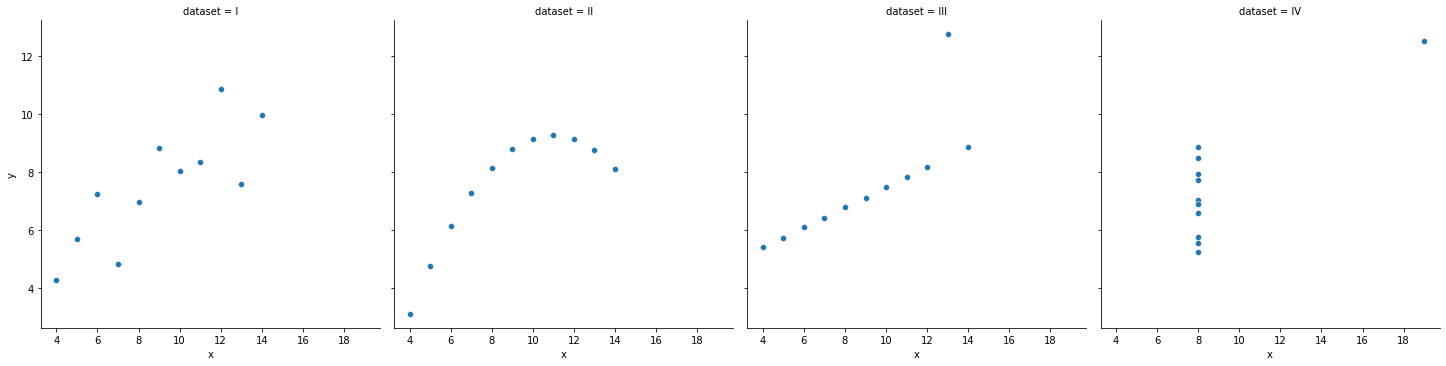

In [19]:
#1 plot the x and y values, keeping each dataset as a separate column

sns.relplot(x = 'x', y = 'y', col = 'dataset', data = anscombe)
# dataset IV does not vary much on x
# dataset III is mostly linear
# dataset II appears to be part of a bell curve
# dataset I might be linear, but has more variance

In [24]:
#2 load InsectSprays and creat a boxplot to show the effectiveness of the sprays
insect_sprays = data('InsectSprays')
insect_sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [25]:
insect_sprays.dtypes

count     int64
spray    object
dtype: object

Text(0.5, 1.0, 'the effectiveness of the sprays')

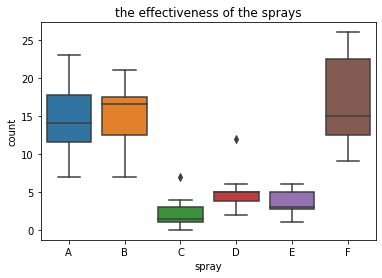

In [42]:
sns.boxplot(data = insect_sprays, x = 'spray', y = 'count')
plt.title('the effectiveness of the sprays')

In [39]:
#3 load the swiss dataset
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [40]:
swiss.dtypes

Fertility           float64
Agriculture         float64
Examination           int64
Education             int64
Catholic            float64
Infant.Mortality    float64
dtype: object

In [41]:
#3 create an attribute called is_catholic that holds boolean values
swiss['is_catholic'] = swiss['Catholic'] > 50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

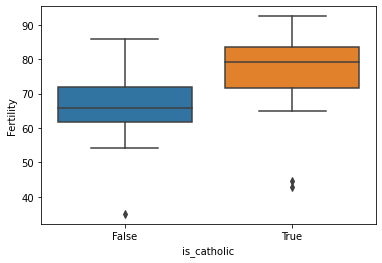

In [47]:
#3 does catholicism affect fertility
sns.boxplot(x = 'is_catholic', y = 'Fertility', data = swiss)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


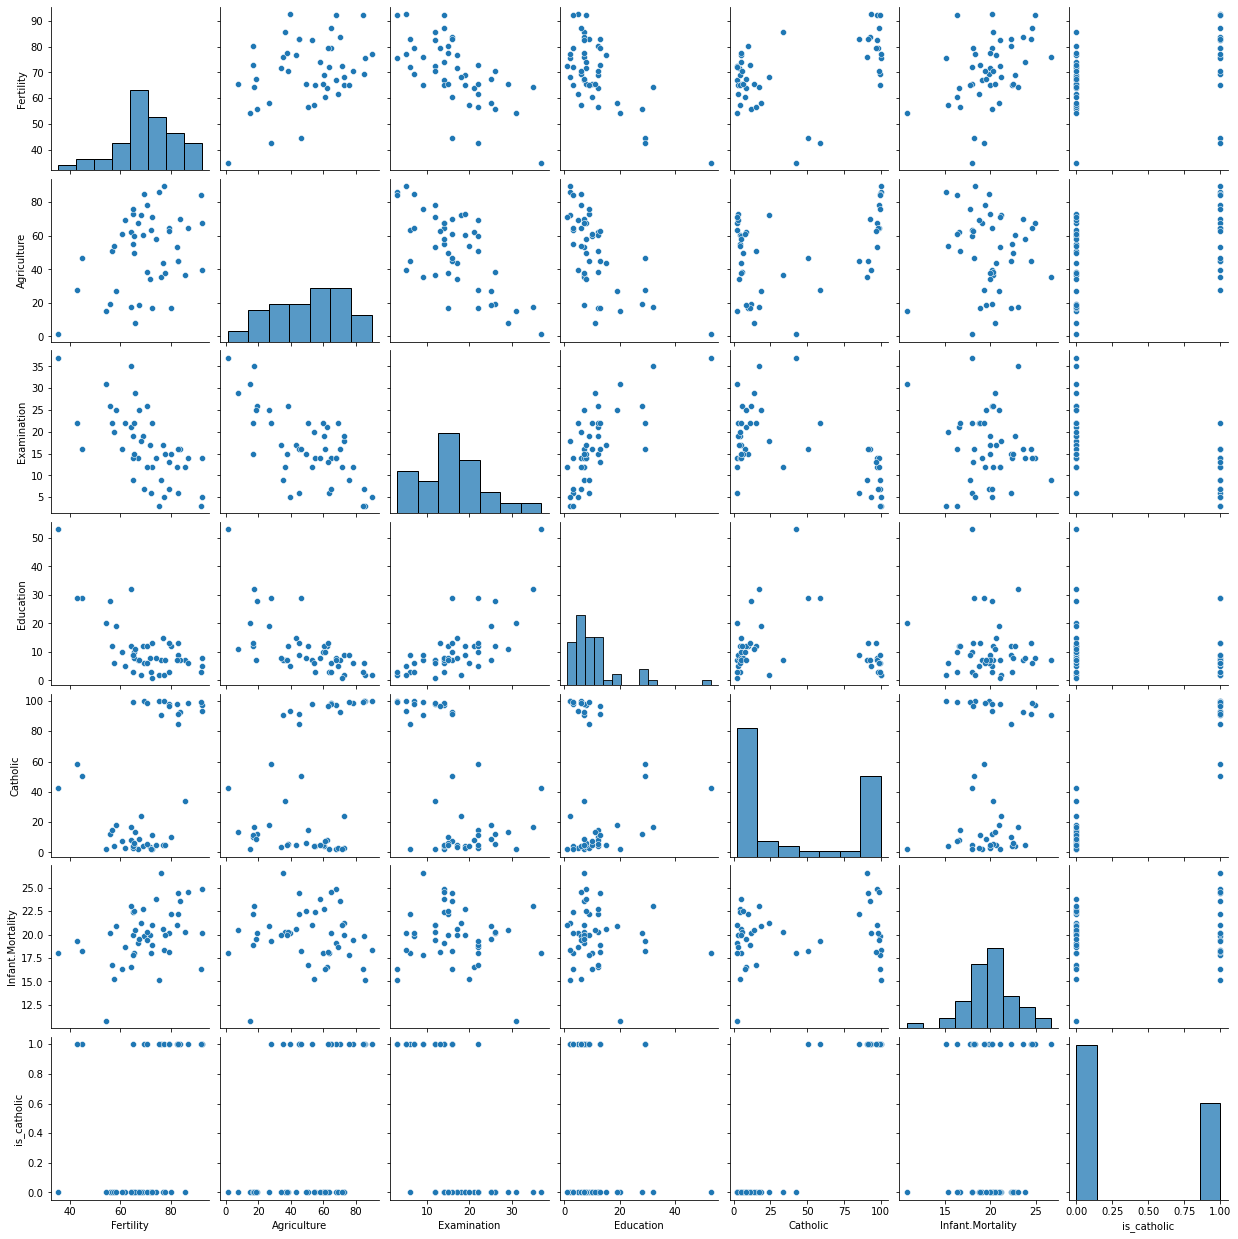

In [50]:
#3 what correlates most strongly with Fertility
sns.pairplot(swiss)

In [51]:
#3
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

In [52]:
#4 using chipotle dataset, create bar chart that shows the four most popular items
#  and the revenue from them
# importing chipotle

from env import host, user, password

def get_db_url (host, user, password, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

url = get_db_url(host, user, password, 'chipotle')

#pd.read_sql('SELECT * FROM orders LIMIT 5 OFFSET 50', url )
orders = pd.read_sql('SELECT * FROM orders', url )
orders = pd.DataFrame(orders)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [97]:
#4
# cleaning the price column
orders['item_price_cleaned'] = orders.item_price.str.replace('$', '').astype(float)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4622 non-null   int64  
 1   order_id            4622 non-null   int64  
 2   quantity            4622 non-null   int64  
 3   item_name           4622 non-null   object 
 4   choice_description  4622 non-null   object 
 5   item_price          4622 non-null   object 
 6   item_price_cleaned  4622 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 252.9+ KB


<ipython-input-97-67af604629cf>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  orders['item_price_cleaned'] = orders.item_price.str.replace('$', '').astype(float)


In [98]:
#4
most_popular = orders.groupby('item_name').quantity.sum().nlargest(4)
most_popular

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [99]:
#4
most_popular.index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

In [100]:
#4
revenue = orders[orders.item_name.isin(most_popular.index)].groupby('item_name').item_price_cleaned.sum()
revenue

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: item_price_cleaned, dtype: float64

In [102]:
#4
revenue = revenue.sort_values(ascending = False).reset_index()
revenue

,item_name,item_price_cleaned
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


<AxesSubplot:xlabel='item_name', ylabel='item_price_cleaned'>

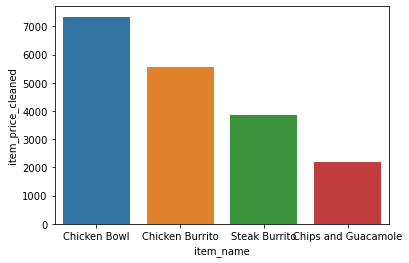

In [103]:
#4
sns.barplot(x = 'item_name', y = 'item_price_cleaned', data = revenue)

In [68]:
#5 load the sleepstudy dataset
sleepstudy = data('sleepstudy')
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [69]:
#5
sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

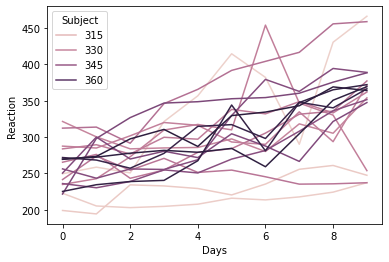

In [73]:
#5 create a line showing individual subjects reaction time
#  and a more prominent line showing change in reaction time
#sns.relplot(x = 'Subject', y = 'Reaction', data = sleepstudy)
sns.lineplot(x = 'Days', y = 'Reaction', hue = 'Subject', data = sleepstudy)

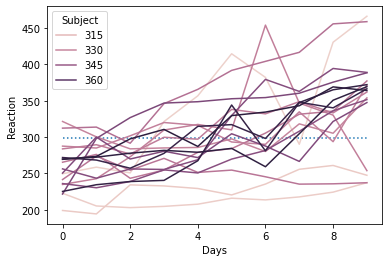

In [79]:
sns.lineplot(x = 'Days', y = 'Reaction', hue = 'Subject', data = sleepstudy)
plt.hlines(sleepstudy['Reaction'].mean(), 0, 9, ls = ':')